# Mall Customers Segment Analysis

In [3]:
import numpy as np
import pandas as pd
from pandas import plotting

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for interactive visualization
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

#import os
#print(os.listdir('../input/'))

In [6]:
data = pd.read_csv("C:\\Users\\saham\\pythonprograms\\Mall_Customers_dataset.csv")
dat = ff.create_table(data.head())
py.iplot(dat)

### Exploring the Dataset

In [7]:
#describe data
desc = ff.create_table(data.describe())
py.iplot(desc)
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In the Table Above we can see the distribution of the variables dataset. But lets visualize it to get a feel for it.

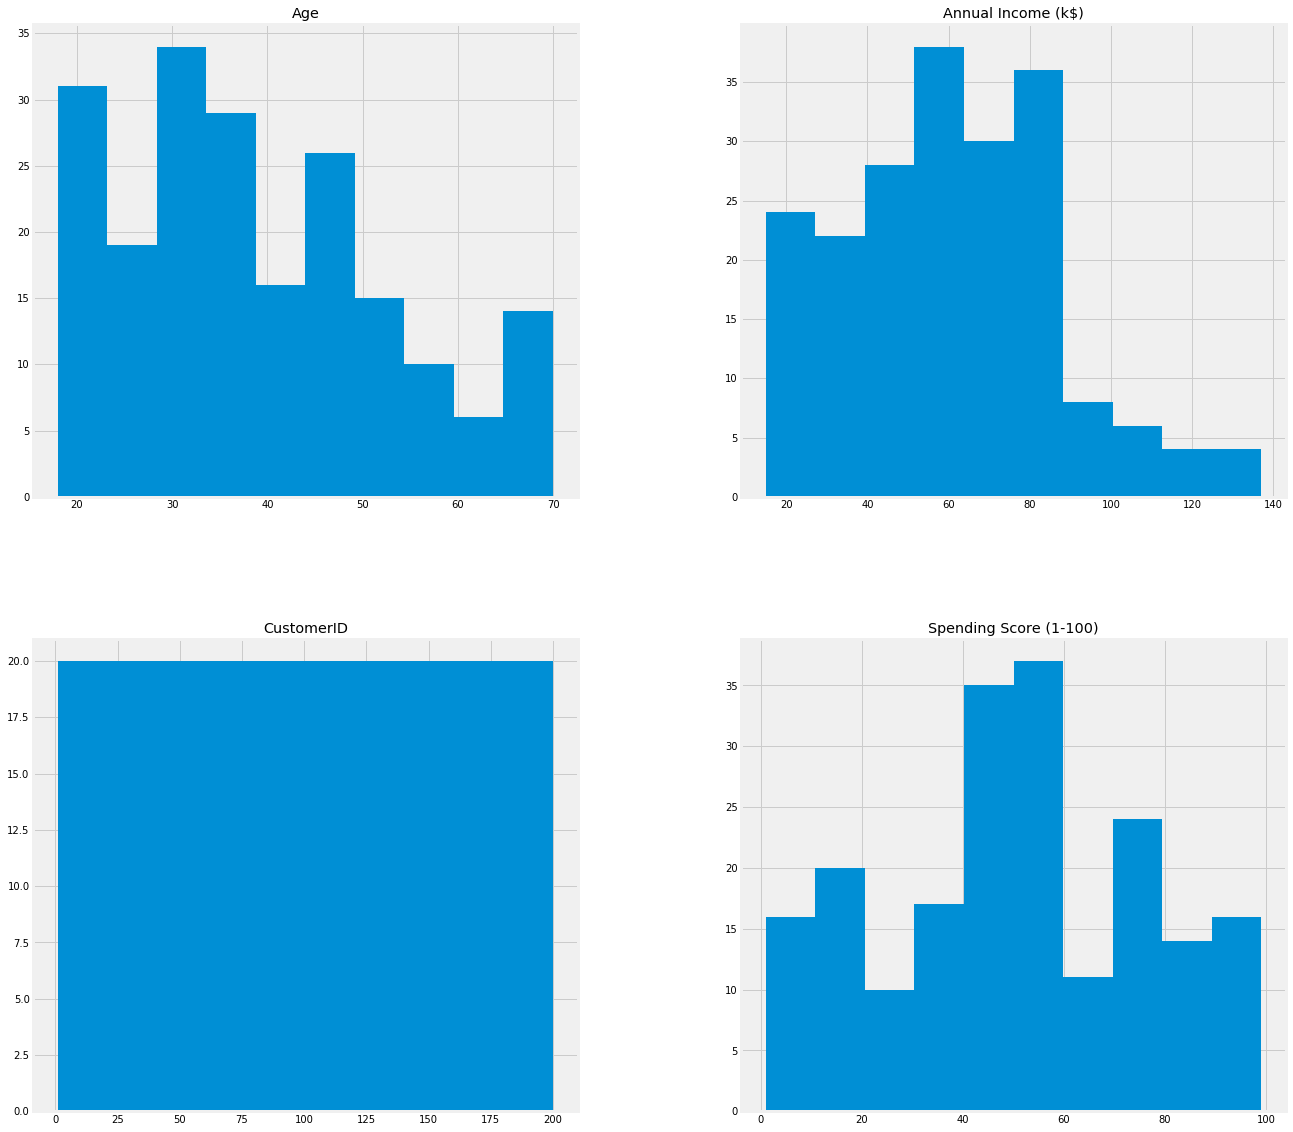

In [8]:

data.hist(figsize=(20,20))
plt.show()


In [9]:
#checking if there is any null data
data.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [10]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

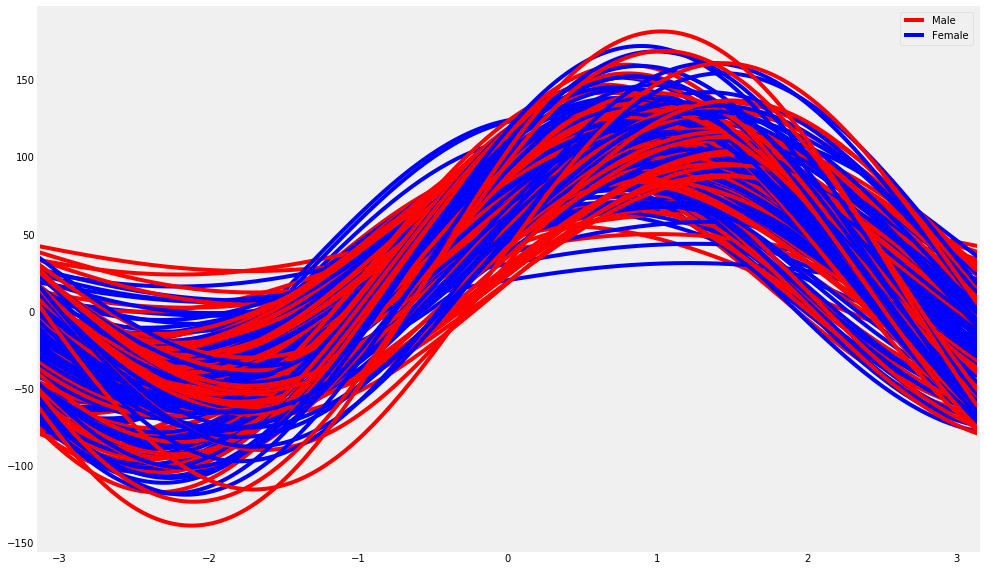

In [11]:
plt.rcParams['figure.figsize'] = (15,10)

plotting.andrews_curves(data.drop("CustomerID", axis =1), "Gender",color=('r','b'))
plt.show()

It has been shown the Andrews curves are able to preserve means, distance (up to a constant) and variances. Which means that Andrews curves that are represented by functions close together suggest that the corresponding data points will also be close together

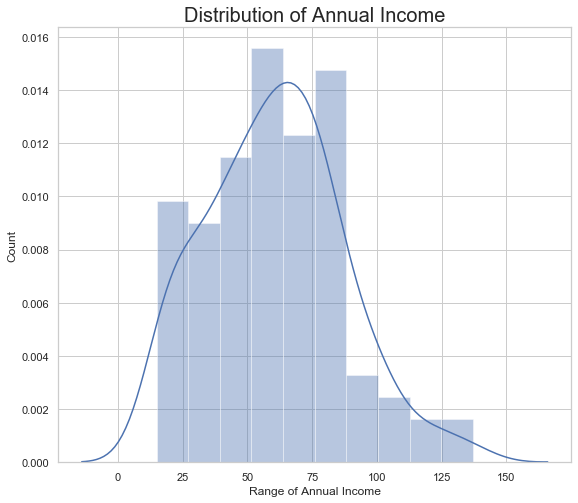

In [13]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18,8)
plt.subplot(1,2,1)
sns.set(style = 'whitegrid')

sns.distplot(data['Annual Income (k$)'])
plt.title("Distribution of Annual Income", fontsize = 20)
plt.xlabel("Range of Annual Income")
plt.ylabel("Count")
plt.show()


In the above Plots we can see the Distribution of Annual Income of the customers,

we can see that There are very small set of people earns more than 95 US Dollars. Most of the people have an earning of around 50-75 US Dollars. Also, we can say that the least Income is around 20 US Dollars.

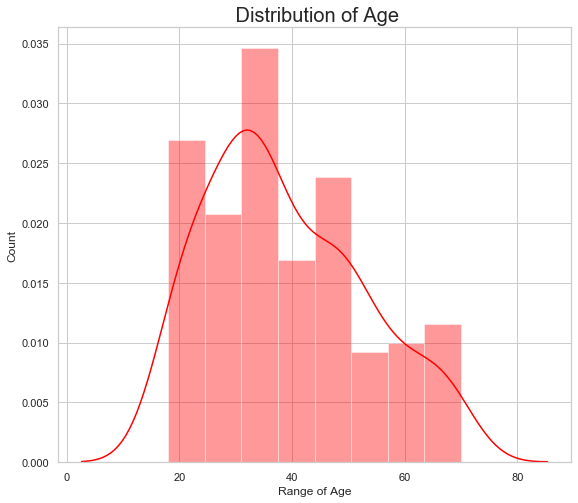

In [14]:
plt.subplot(1,2,2)
sns.set(style = 'whitegrid')
sns.distplot(data['Age'], color = 'red')
plt.title(" Distribution of Age", fontsize = 20)
plt.xlabel("Range of Age")
plt.ylabel("Count")
plt.show()

Here the plot is as expected,the most regular customers for the Mall has age around 30-35 years of age. Whereas the the senior citizens age group is the least frequent visitor in the Mall. Youngsters are lesser in umber as compared to the Middle aged people

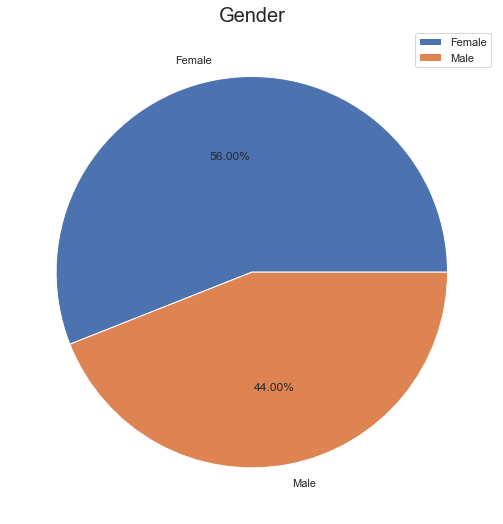

In [15]:
labels = [ 'Female', 'Male' ]
size = data['Gender'].value_counts()

plt.rcParams['figure.figsize'] = (9,9)
plt.pie(size , labels = labels, autopct = '%.2f%%')
plt.title('Gender', fontsize =20)
plt.legend()
plt.show()

plt.close()

By looking at the above pie chart which explains about the distribution of Gender in the Mall

Interestingly, The Females are in the lead with a share of 56% whereas the Males have a share of 44%, that's a huge gap specially when the population of Males is comparatively higher than Females.

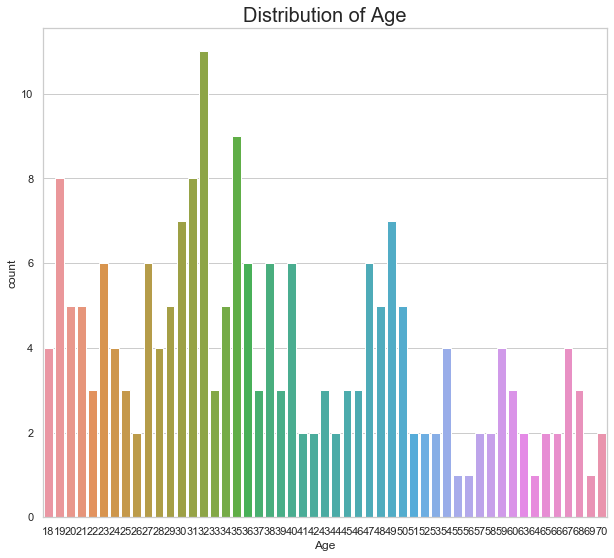

In [18]:
sns.countplot(data['Age'])
plt.title("Distribution of Age", fontsize = 20)
plt.show()

This Graph shows a more Interactive Chart about the distribution of each Age Group in the Mall for more clariy about the Visitor's Age Group in the Mall.

By looking at the above graph-, It can be seen that the Ages from 27 to 39 are very much frequent but there is no clear pattern, we can only find some group wise patterns such as the the older age groups are lesser frequent in comparison. Interesting Fact, There are equal no. of Visitors in the Mall for the Agee 18 and 67. People of Age 55, 56, 69, 64 are very less frequent in the Malls. People at Age 32 are the Most Frequent Visitors in the Mall.

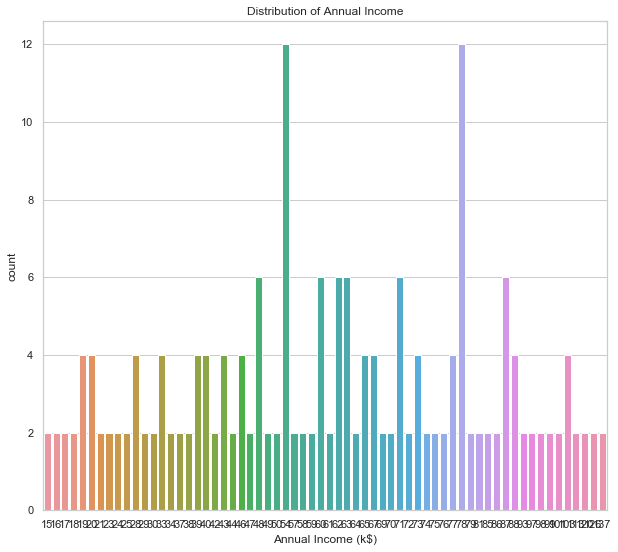

In [19]:
sns.countplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income')
plt.show()

Again, This is also a chart to better explain the Distribution of Each Income level, Interesting there are customers in the mall with a very much comparable freqyuency with their Annual Income ranging from 15 US Dollars to 137K US Dollars. There are more Customers in the Mall whoc have their Annual Income as 54k US Dollars or 78 US Dollars.

Text(0.5, 1.0, 'Distrution of Spending Score')

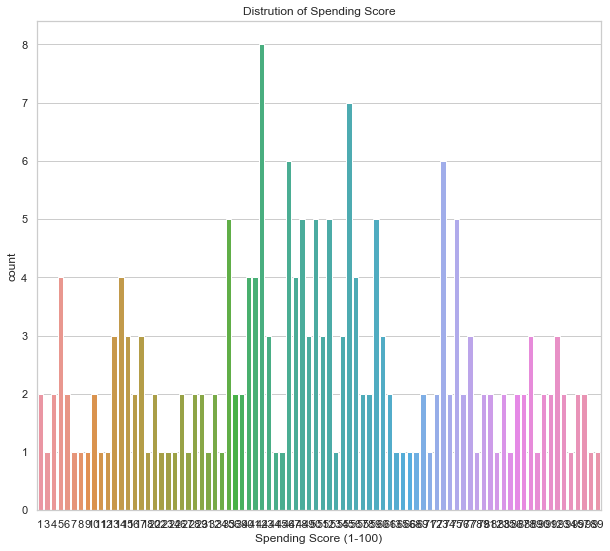

In [20]:
sns.countplot(data['Spending Score (1-100)'])
plt.title("Distrution of Spending Score")


This is the Most Important Chart in the perspective of Mall, as It is very Important to have some intuition and idea about the Spending Score of the Customers Visiting the Mall.

On a general level, we may conclude that most of the Customers have their Spending Score in the range of 35-60. Interesting there are customers having I spending score also, and 99 Spending score also, Which shows that the mall caters to the variety of Customers with Varying needs and requirements available in the Mall.

#### Correlation
Let's see how the the correlation between the different attributes of the Dataset looks like.

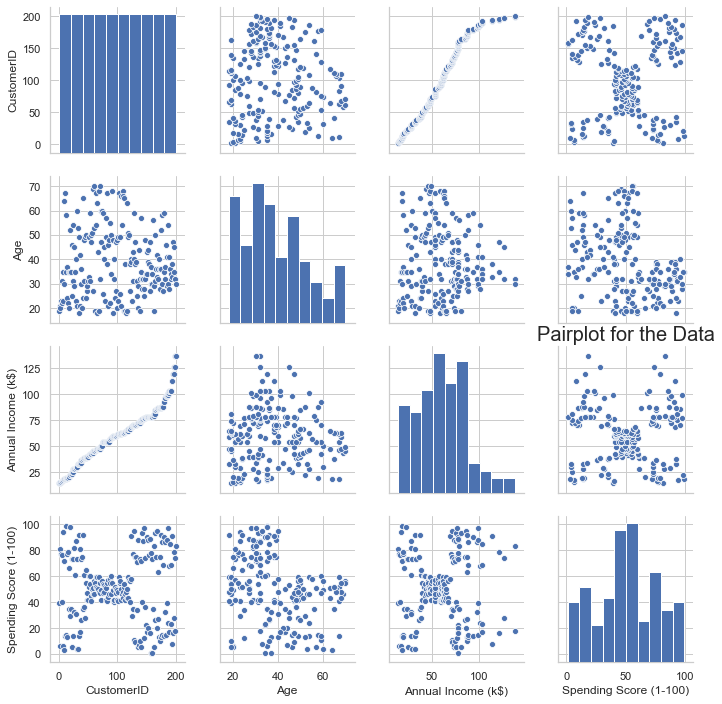

In [22]:
sns.pairplot(data)
plt.title('Pairplot for the Data', fontsize = 20)
plt.show()

We can clearly see that these attributes do not have good correlation among them. The CustomerID and Spending Score are showing clusters like distribution, we can take a deeper look at this in a minute.

Heat map reflects the most correlated features with Orange Color and least correlated features with yellow color.

We can clearly see that these attributes do not have good correlation among them, that's why we will proceed with all of the features.

In [15]:
data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


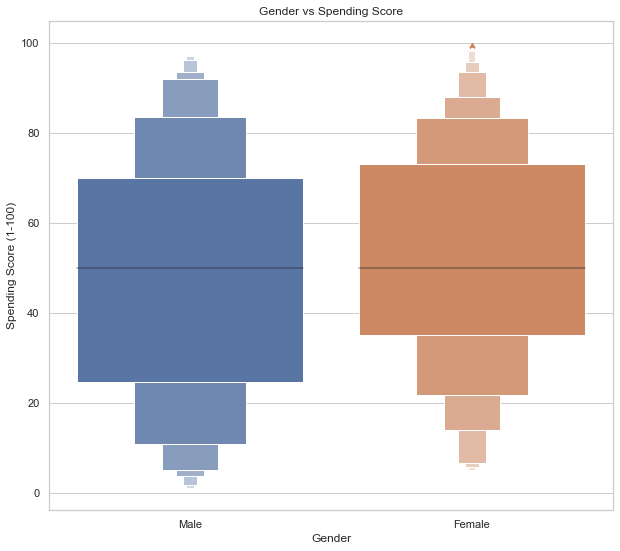

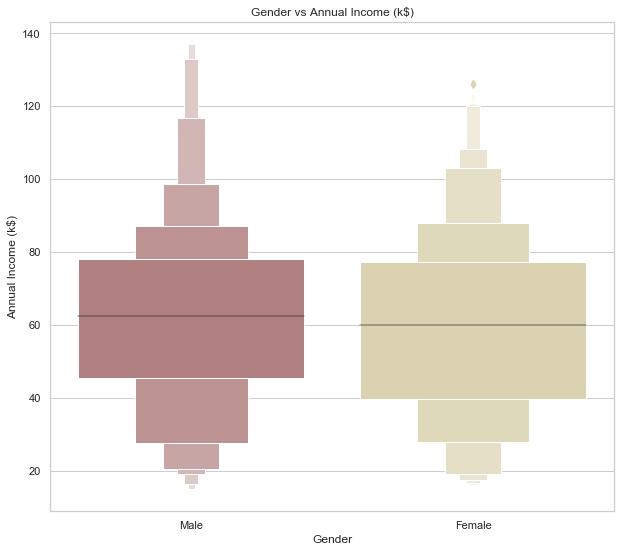

In [24]:
sns.boxenplot(data['Gender'], data['Spending Score (1-100)'])
plt. title("Gender vs Spending Score")
plt.show()

sns.boxenplot(data['Gender'],data['Annual Income (k$)'], palette ='pink')
plt. title("Gender vs Annual Income (k$)")
plt.show()


Here we ac see a Bi-variate Analysis between Gender and Spending Score and that with Annual Income.

It is clearly visible that the most of the males have a Spending Score of around 25k US Dollars to 70k US Dollars whereas the Females have a spending score of around 35k US Dollars to 75k US Dollars. which again points to the fact that women are Shopping Leaders.
There are more number of males who get paid more than females. But, The number of males and females are equal in number when it comes to low annual income.

### Clustering Analysis 

In this section, we will use Kmeans and Hierarchical Clustering Algorithms and Evaluate the performance of the booth.


In [26]:
x = data.iloc[:, [3,4]].values
print(x.shape)
print(data.shape)

(200, 2)
(200, 5)


#### 1. K-means

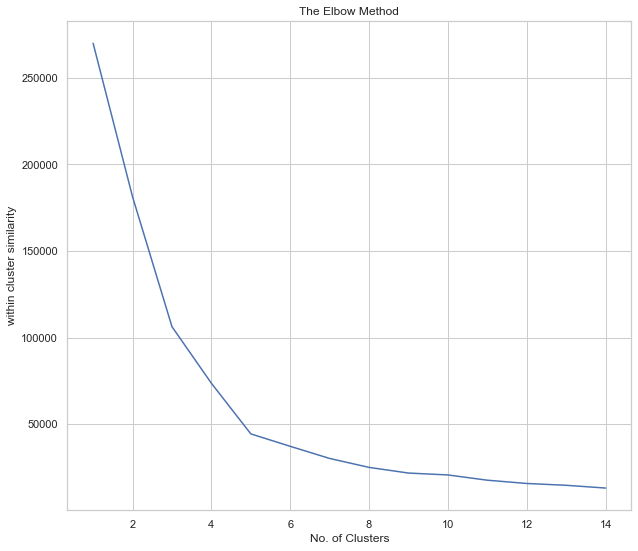

In [28]:
# use elbo method to find  Optimal num of cluster
from sklearn.cluster import KMeans

wcss = []
for i in range(1,15):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1,15), wcss)
plt.title("The Elbow Method")
plt.xlabel("No. of Clusters")
plt.ylabel("within cluster similarity")
plt.show()

Here we have used the Elbow method to find the number of optimal clusters and shows we should go for 5.

In [29]:
# K mean with 5 cluster 

km = KMeans( n_clusters = 5, init = "k-means++")
# fir KMeans to X=3,4 column of dataset -'Annual Income (k$)', 'Spending Score (1-100)'
y_means = km.fit_predict(x)

# Visualizing the Cluster
#plt.scatter(x[y_means == 0])

    

In [30]:
x[10:20,].shape

(10, 2)

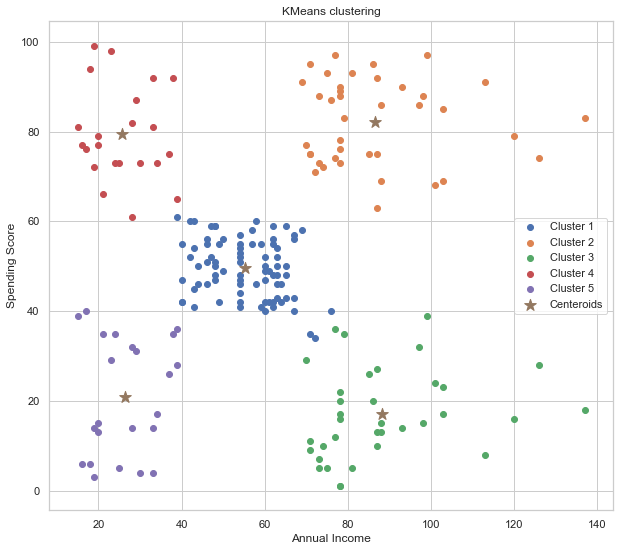

In [31]:
plt.scatter(x[y_means ==0, 0], x[y_means ==0, 1], label = "Cluster 1")
plt.scatter(x[y_means ==1, 0], x[y_means ==1, 1], label = "Cluster 2")
plt.scatter(x[y_means ==2, 0], x[y_means ==2, 1], label = "Cluster 3")
plt.scatter(x[y_means ==3, 0], x[y_means ==3, 1], label = "Cluster 4")
plt.scatter(x[y_means ==4, 0], x[y_means ==4, 1], label = "Cluster 5")
plt.scatter(km.cluster_centers_[:,0] , km.cluster_centers_[:,1], s =150,marker= '*', label = 'Centeroids') # centeroids
plt.xlabel('Annual Income') #1 col
plt.ylabel('Spending Score') #2 col
plt.legend()
plt.title("KMeans clustering")
plt.show()


This Clustering Analysis gives us a very clear insight about the different segments of the customers in the Mall. There are clearly Five segments of Customers namely Miser, General, Target, Spendthrift, Careful based on their Annual Income and Spending Score which are reportedly the best factors/attributes to determine the segments of a customer in a Mall.

### 2. Hierarchical Clustering  
Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other

Using Dendrogram to find optimal Cluster

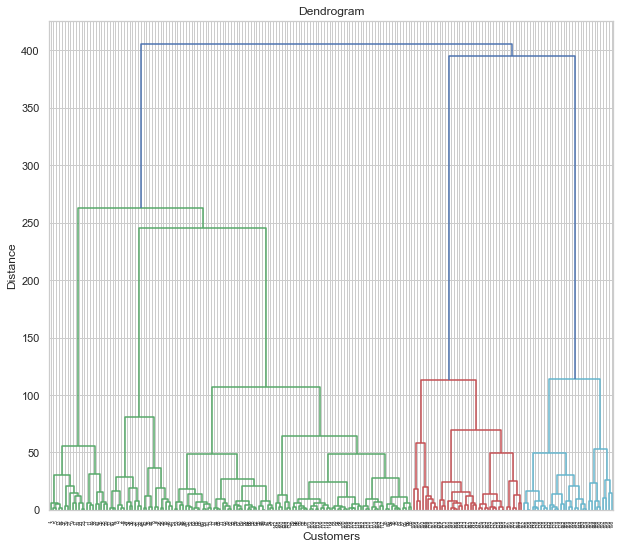

In [32]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
       # ward = minimizes the varience of cluster being merged
    
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()

In [33]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5)
y = hc.fit_predict(x)

In [34]:
from sklearn.metrics import silhouette_score

In [35]:
silhouette_score(x,y)

0.5529945955148897

In [36]:
#Clusters based on Age
x = data.iloc[: ,  [2,4]].values

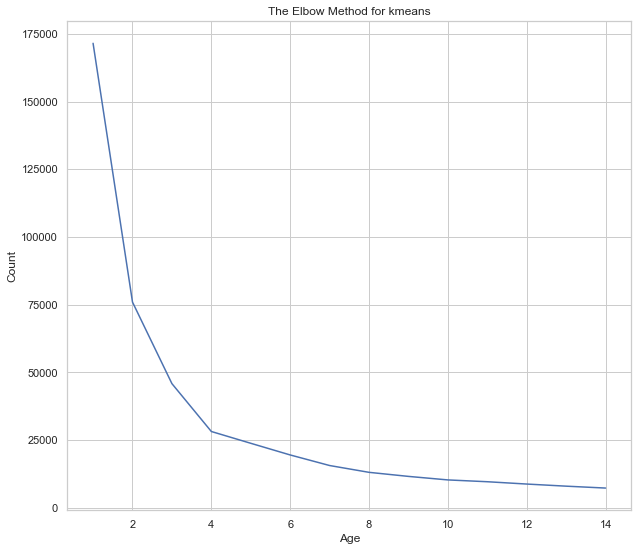

In [37]:
# kMeans

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method for kmeans')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


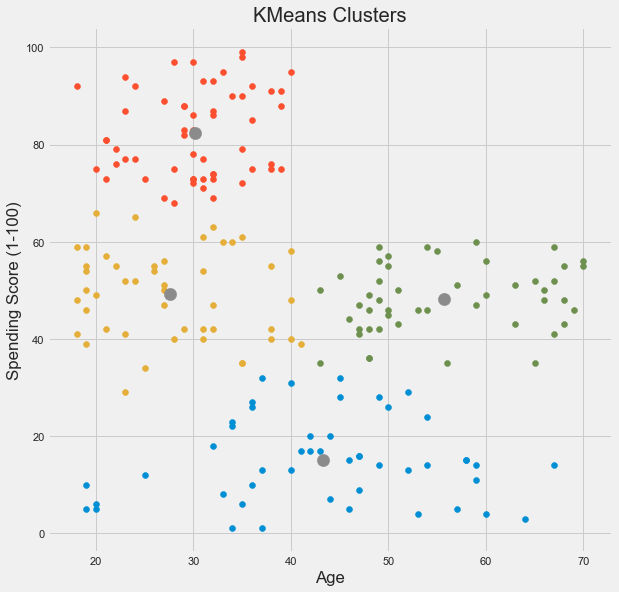

In [68]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.title('KMeans Clusters')

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1] )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1])
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1])
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s =150)

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [70]:
# Kmeans for 3 dimensional data
x = data[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']].values
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [74]:
labels = km.labels_
centroids = km.cluster_centers_
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [83]:
data['labels'] = labels
data.columns


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'labels'],
      dtype='object')

In [82]:
import plotly.express as px
fig = px.scatter_3d(x = data['Age'], y = data['Spending Score (1-100)'], z= data['Annual Income (k$)'] ,color=data['labels'])

fig.show()